In [1]:
import numpy as np
import pandas as pd
import numpy.random as nr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130710_timesequence_fin_exist', 'r') as f1: 
  f1=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130710_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130711_timesequence_fin_exist', 'r') as f2: 
  f2=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130711_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130712_timesequence_fin_exist', 'r') as f3: 
  f3=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130712_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130713_timesequence_fin_exist', 'r') as f4: 
  f4=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130713_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130714_timesequence_fin_exist', 'r') as f5: 
  f5=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130714_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130715_timesequence_fin_exist', 'r') as f6: 
  f6=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130715_timesequence_fin_exist', 'r')
with open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130716_timesequence_fin_exist', 'r') as f7: 
  f7=open('/content/gdrive/My Drive/Project subway/Data/rawdata_all_sub_20130716_timesequence_fin_exist', 'r')

flist=[f1,f2,f3,f4,f5,f6,f7]
deptime = []  # 8(9) 출발시간
deploc = {} # 9(10) 출발장소
deploc2= [] # 출발장소 리스트형

arrtime = []  # 10(11) 도착시간
arrloc = {} #11(12) 도착장소
arrloc2=[] # 도착장소 리스트형

mostplace={}
spendtime={}
avestdtime={}
mostinfo={}

함수
-----------------------

In [3]:
#함수

def caltime(x):
  ye=x//10**10
  mo=(x//10**8)%100
  da=(x//10**6)%100
  ho=(x%10**6)//10**4
  mi=(x%10**4)//100
  se=(x%100)

  scalesec=ho * 3600 + mi * 60 + se
  return [ye,mo,da,ho,mi,se,scalesec]

def caltimeback(x):
  bho = x // 3600
  bmi = x % 3600 // 60
  bse = x % 60
  return [bho,bmi,bse]

Main Part
---------------

In [4]:
statime={}
mintime={}
for j in range(len(flist)): #len(flist)
  tryf=flist[j]
  while True:    # 파일의 줄을 읽어서 한 줄을 하나의 문자열로 저장함(리스트형식으로)
    line=tryf.readline()
    if not line: 
      print('끝')
      break
    line=line.split(',')
    #n=list(filter(None,n))

    #시간계산
    nstat=int(line[8]) #[ye,mo,da,ho,mi,se,scalesec]
    ndest=int(line[10])
    nstat=caltime(nstat)
    ndest=caltime(ndest) 

    taketime=ndest[6]-nstat[6] # 걸린시간 
    if taketime>0 and line[9]=='0216' and line[11]=='0222':
    #if taketime>0 and line[11]=='0234' and line[7]=='06':
      str1=nstat[6] #출발역+도착역으로 key값 저장
      #print("원시간",line[8], "바꾼시간",nstat)
      try:
        spendtime[str1].append(taketime) # value를 리스트로 지정하면 거기에 리스트함수 적용가능
      except:
        spendtime[str1] = [taketime]

          # 도착, 출발
      try:
        mostplace[str1] += 1
      except:
        mostplace[str1] = 1
      ttime= nstat[3]*3600 + nstat[4]*60
      try:
        mintime[ttime] += 1
      except:
        mintime[ttime]  = 1

끝
끝
끝
끝
끝
끝
끝


In [5]:
avekey=list(spendtime.keys())
for i in range(0, len(list(spendtime.keys()))):
  str1=avekey[i]
  aven=np.mean(spendtime[str1])
  stdn=np.std(spendtime[str1])
  manytimes=mostplace[str1]
  mostinfo[str1] = [manytimes,aven,stdn]
t=[]
#dic를 items()를 활용해서 튜플로 바꿔준 다음에 정렬하기.
#print("가장많이 이용한 구간 랭킹=",sorted(mostplace.items(), key= lambda x: x[1], reverse= True))
ranking1=sorted(mostinfo.items(), key= lambda x: x[1], reverse= True)

In [6]:
for i in range(10):
  print(i+1,'순위:',"구간",ranking1[i])
print("구간별 평균시간과 표준편차 랭킹")
for i in range(3):
  str0=ranking1[i][0]
  print(spendtime[str0])

1 순위: 구간 (32831, [10, 1043.2, 126.00619032412652])
2 순위: 구간 (30333, [9, 1046.4444444444443, 116.61723820650865])
3 순위: 구간 (32027, [9, 898.1111111111111, 85.67178252486435])
4 순위: 구간 (30983, [8, 1010.5, 69.33794055205274])
5 순위: 구간 (29916, [8, 991.875, 120.34579084870397])
6 순위: 구간 (31348, [8, 956.75, 65.87440701820397])
7 순위: 구간 (30956, [8, 940.125, 46.38005363300047])
8 순위: 구간 (30942, [8, 939.25, 113.38402665278738])
9 순위: 구간 (30704, [8, 912.75, 44.876915000922246])
10 순위: 구간 (30707, [8, 896.75, 51.48725570468871])
구간별 평균시간과 표준편차 랭킹
[932, 1361, 1062, 1082, 1082, 1074, 1033, 914, 894, 998]
[1087, 1082, 1085, 1174, 881, 1151, 802, 1107, 1049]
[871, 816, 760, 926, 839, 959, 1073, 916, 923]


그래프 그리기
--------------

In [7]:
plt.figure(figsize=(40,10))
keylist2=list(mintime.keys())
print(mintime)
rank_num=sorted(mintime.items(), key= lambda x: x[1], reverse= True)
mintime2=sorted(mintime.items(), key= lambda x: x[0], reverse= False)
ylist=[]
'''
for i in range(len(mintime2)):
  index=mintime2[i]
  ylist.append(mintime2[index])
plt.scatter(keylist2, ylist,c='g',s=1)
'''
xlist2=[]
ylist2=[]
for i in range(len(mintime2)):
  if mintime2[i][0]>15000:
    xlist2.append(mintime2[i][0])
    ylist2.append(mintime2[i][1])

print(rank_num)

{35520: 77, 46380: 36, 64440: 44, 30120: 144, 29520: 86, 66960: 57, 34080: 153, 39000: 39, 57060: 40, 29460: 149, 76020: 33, 28980: 93, 66540: 45, 31260: 137, 59280: 55, 84120: 7, 52200: 52, 29820: 95, 64080: 69, 64920: 83, 57240: 59, 47820: 39, 29400: 109, 39420: 39, 53400: 43, 39900: 34, 48420: 66, 25080: 31, 33420: 99, 27480: 69, 68160: 62, 50280: 48, 48840: 78, 26580: 104, 27120: 149, 60360: 27, 74820: 21, 35220: 44, 31380: 89, 31140: 127, 52140: 47, 57600: 52, 33060: 102, 71880: 30, 33720: 63, 53760: 26, 38760: 33, 37980: 47, 75120: 31, 70980: 40, 36660: 36, 74760: 26, 73200: 35, 57120: 47, 65880: 70, 41220: 80, 48780: 74, 60900: 41, 29700: 115, 41640: 86, 43740: 39, 25980: 39, 30720: 171, 76920: 17, 38460: 49, 28560: 98, 67800: 60, 30480: 131, 63180: 45, 47340: 41, 27900: 47, 41160: 44, 62100: 51, 62940: 64, 65160: 71, 32400: 109, 31860: 63, 63060: 78, 24900: 45, 27840: 65, 30600: 93, 83700: 5, 27360: 140, 77880: 25, 30360: 91, 34440: 117, 31980: 104, 65640: 59, 31440: 77, 52800:

<Figure size 2880x720 with 0 Axes>

In [8]:
print(rank_num[10])

(34080, 153)


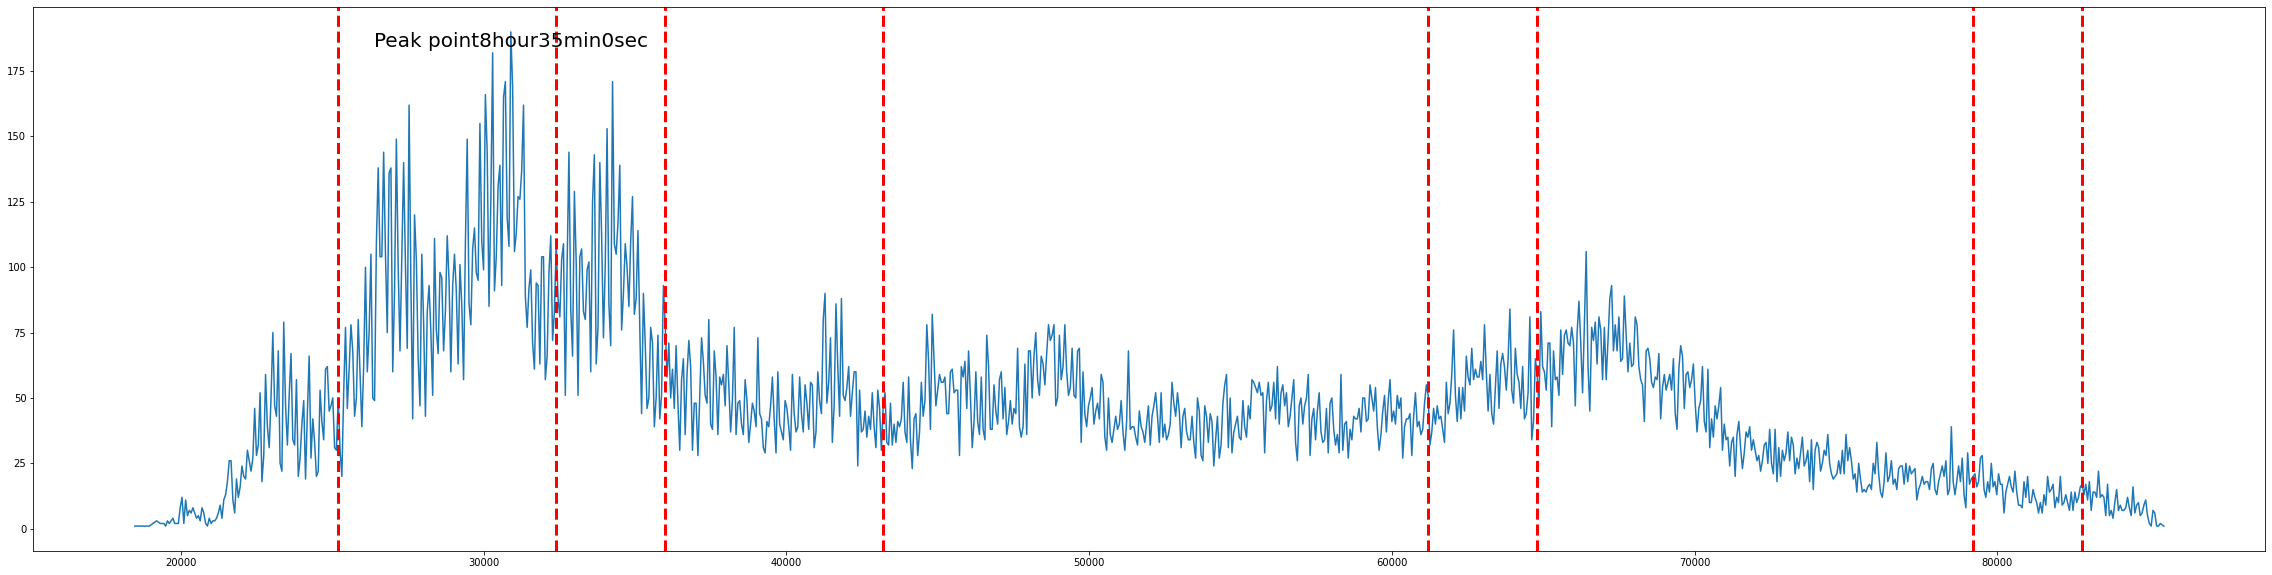

In [9]:
plt.figure(figsize=(40,10))
plt.plot(xlist2,ylist2)
#peak
#plt.hlines(rank_num[0][1], 15000, rank_num[0][0], colors='g', linewidth=1)
#plt.vlines(rank_num[0][0], 0, rank_num[0][1], colors='g', linewidth=1)
ppint1= caltimeback(rank_num[0][0])
plt.text(rank_num[0][0],rank_num[0][1],
         'Peak point' + str(ppint1[0]) + 'hour' + str(ppint1[1]) + 'min' + str(ppint1[2]) +'sec' ,
         fontsize = 20,
         color='k',
         horizontalalignment='center',
         verticalalignment='top')
#plt.hlines(rank_num[2][1], 15000, rank_num[2][0], colors='g', linewidth=1)
#plt.vlines(rank_num[2][0], 0, rank_num[2][1], colors='g', linewidth=1)
'''
ppint2= caltimeback(rank_num[77][0])
plt.text(rank_num[77][0],rank_num[77][1],
         'Peak point' + str(ppint2[0]) + 'hour' + str(ppint2[1]) + 'min' + str(ppint2[2]) +'sec',
         fontsize = 20,
         color='k',
         horizontalalignment='center',
         verticalalignment='top')

ppint3= caltimeback(rank_num[142][0])
plt.text(rank_num[142][0],rank_num[142][1],
         'Peak point' + str(ppint3[0]) + 'hour' + str(ppint3[1]) + 'min' + str(ppint3[2]) +'sec',
         fontsize = 20,
         color='k',
         horizontalalignment='center',
         verticalalignment='top')
'''

plt.axvline(25200, color='r', linestyle='--', linewidth=3, label='7시')
#plt.axvline(28800, color='r', linestyle='--', linewidth=3, label='8시')
plt.axvline(32400, color='r', linestyle='--', linewidth=3, label='9시')
plt.axvline(36000, color='r', linestyle='--', linewidth=3, label='10시')
plt.axvline(43200, color='r', linestyle='--', linewidth=3, label='12시')
plt.axvline(61200, color='r', linestyle='--', linewidth=3, label='17시')
plt.axvline(64800, color='r', linestyle='--', linewidth=3, label='18시')
plt.axvline(79200, color='r', linestyle='--', linewidth=3, label='22시')
plt.axvline(82800, color='r', linestyle='--', linewidth=3, label='23시')

In [76]:
indicate=0
num=len(spendtime)
keylist=list(spendtime.keys())
'''
for i in range(num):
  if sum(spendtime[keylist[i]])>4000:
    print(i)
    #spendtime[i]=ranking1[rank][1][1]
    print(spendtime[keylist[i]])
'''
xlist=[]
ylist=[]
ra = 15000
rb = 0
print(rb - ra, 720)
for i in range(num):
  x=int(keylist[i])
  y=spendtime[keylist[i]]
  y=np.mean(y)
  if (y < 4500 and  x >ra ):#and  x< rb)):
    xlist.append(x)
    ylist.append(y)
#plt.errorbar(ranking1[0][1][1], [0,9] , yerr=0 , c='r', capsize=30) # 실제 평균값에서 에러바

-15000 720


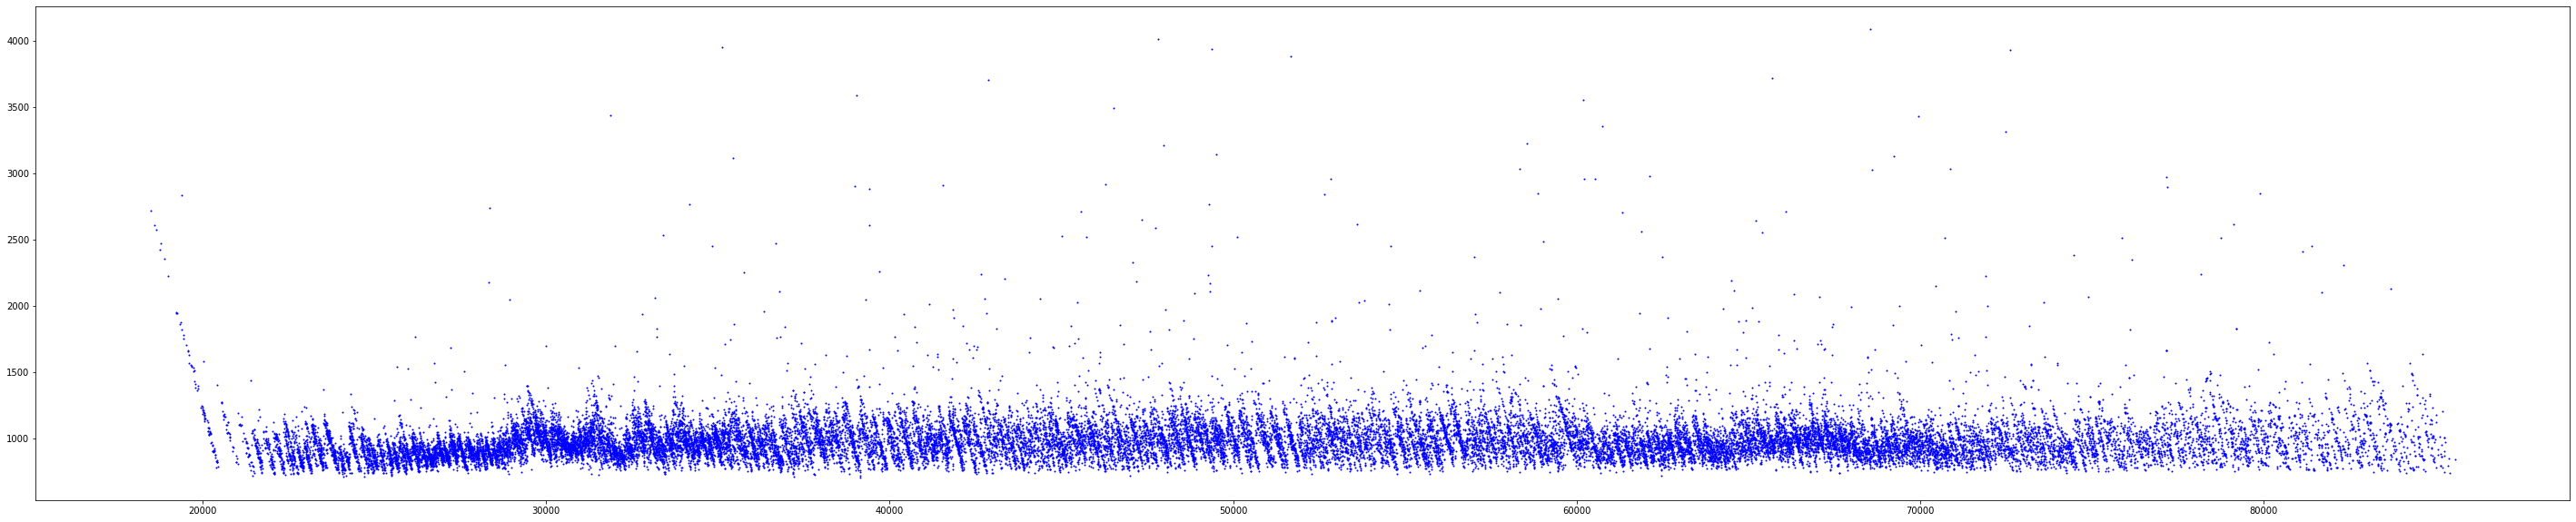

In [79]:
plt.figure(figsize=(50,10))
plt.scatter(xlist,ylist,c='b',s=1)

0.9999891381727445 -40928.55653463393
41751 42149
821.9899732163249 1219.985650209077


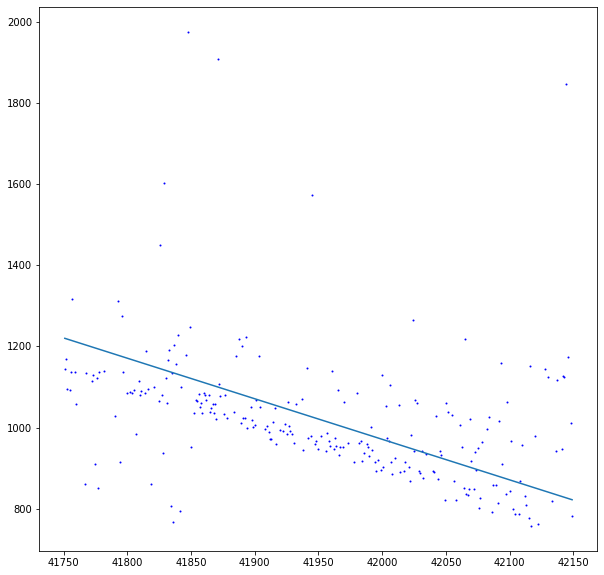

In [74]:
#선형학습
plt.figure(figsize=(10,10))
plt.scatter(xlist,ylist,c='b',s=1)
w=1
b=1
def cost(w,b):
  for i in range(len(xlist)):
    cf = (1/(2*len(xlist))) * (w * xlist[i] + b - ylist[i])**2
  return cf
xlin = np.array(xlist)
ylin = np.array(ylist)
x = xlin
xx = xlin * xlin
y= ylin
xy = xlin * ylin

ex = np.mean(x)
exx = np.mean(xx)
ey = np.mean(y)
exy= np.mean(xy)
w = ((ex)**2 -(ex*ey) + (exy) ) / exx
b = -1 * ex * w + ey
print(w,b)

xlin = sorted(xlin)
stax = xlin[0] ; finx = xlin[len(xlin)-1]
stay = stax * w + b ; finy = finx * w + b
plt.plot([stax,finx],[finy,stay])
print(stax, finx)
print(stay, finy)

In [12]:
'''
rank=0
index=str(ranking1[rank][0]) #1순위 구간이름 문자열로 변환
times=sorted(times.items(), key= lambda x: x[1], reverse= True)
print(times)

insider=0
outsider=0
mean=ranking1[0][1][1]
std=ranking1[0][1][2]
for i in range(len(times)):
  if times[i][0]>=mean+std:
    outsider+=times[i][1]
  else:
    insider+=times[i][1]
print("평균+표준편차보다 더 늦게 온 사람")
print(outsider, insider)
print((outsider/(insider+outsider))*100)

insider=0
outsider=0
for i in range(len(times)):
  if times[i][0]>=mean:
    outsider+=times[i][1]
  else:
    insider+=times[i][1]
print("평균보다 더 늦게 온 사람")
print(outsider, insider)
print((outsider/(insider+outsider))*100)
'''

'\nrank=0\nindex=str(ranking1[rank][0]) #1순위 구간이름 문자열로 변환\ntimes=sorted(times.items(), key= lambda x: x[1], reverse= True)\nprint(times)\n\ninsider=0\noutsider=0\nmean=ranking1[0][1][1]\nstd=ranking1[0][1][2]\nfor i in range(len(times)):\n  if times[i][0]>=mean+std:\n    outsider+=times[i][1]\n  else:\n    insider+=times[i][1]\nprint("평균+표준편차보다 더 늦게 온 사람")\nprint(outsider, insider)\nprint((outsider/(insider+outsider))*100)\n\ninsider=0\noutsider=0\nfor i in range(len(times)):\n  if times[i][0]>=mean:\n    outsider+=times[i][1]\n  else:\n    insider+=times[i][1]\nprint("평균보다 더 늦게 온 사람")\nprint(outsider, insider)\nprint((outsider/(insider+outsider))*100)\n'

마무리
------------------

In [13]:
for i in range(len(flist)):
  tryf=flist[i]
  tryf.close()